# IBM Employee Attrition and The Possible Factors for Employee Attrition
## Research questions
• What do you think are the 3 factors behind employee attrition? \
• What is the relationship between Education and Monthly Income? \
• What is the effect of age on attrition? \
• Is Income the main factor in employee attrition? \
• How does work-life balance impact the overall attrition rate?

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3

In [2]:
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

In [3]:
# Create connection to Database
con = sqlite3.connect('attr_data.db')

# Read data into DF
df = pd.read_sql_query("SELECT * FROM attrition_records", con)
df.head()

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


## Data Preprocessing

In [4]:
# Transforming Education column
education = {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"}
df['Education'] = df['Education'].map(education)

# Transforming EnvironmentSatisfaction column
envrionmentSatisfaction = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(envrionmentSatisfaction)

# Transforming jobInvolvement column
jobInvolvement = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
df['JobInvolvement'] = df['JobInvolvement'].map(jobInvolvement)

# Transforming jobSatisfaction column
jobSatisfaction = {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
df['JobSatisfaction'] = df['JobSatisfaction'].map(jobSatisfaction)

# Transforming performanceRating column
performanceRating = {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"}
df['PerformanceRating'] = df['PerformanceRating'].map(performanceRating)

# Transforming relationshipSatisfaction column
relationshipSatisfaction = {1: "Low", 2: "Good", 3: "Excellent", 4: "Outstanding"}
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].map(relationshipSatisfaction)

# Transforming workLifeBalance column
workLifeBalance = {1: "Bad", 2: "Good", 3: "Better", 4: "Best"}
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(workLifeBalance)

In [5]:
# view transformed columns
df.sample(5)

,id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
508,509,35,No,Travel_Rarely,1017,Research & Development,6,Master,Life Sciences,1,691,Medium,Male,82,Low,2,Research Scientist,Very High,Single,6646,19368,1,Y,No,13,Excellent,Good,80,0,17,3,Better,17,11,11,8
369,370,31,No,Travel_Rarely,408,Research & Development,9,Master,Life Sciences,1,493,High,Male,42,Medium,1,Research Scientist,Medium,Single,2657,7551,0,Y,Yes,16,Excellent,Outstanding,80,0,3,5,Better,2,2,2,2
832,833,37,No,Travel_Rarely,367,Research & Development,25,College,Medical,1,1161,High,Female,52,Medium,2,Healthcare Representative,Very High,Divorced,5731,17171,7,Y,No,13,Excellent,Excellent,80,2,9,2,Better,6,2,1,3
733,734,26,No,Travel_Rarely,1066,Research & Development,2,College,Medical,1,1018,Very High,Male,32,Very High,2,Manufacturing Director,Very High,Married,5472,3334,1,Y,No,12,Excellent,Good,80,0,8,2,Better,8,7,1,3
696,697,45,No,Non-Travel,805,Research & Development,4,College,Life Sciences,1,972,High,Male,57,High,2,Laboratory Technician,Medium,Married,4447,23163,1,Y,No,12,Excellent,Good,80,0,9,5,Good,9,7,0,8


In [6]:
# View duplicates
df.duplicated().any()

False

In [7]:
# View missing values
df.isna().any()

id                          False
Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYe

In [8]:
# view df columns
df_cols= [row for row in df.columns]
print(df_cols)

['id', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [9]:
# view columns datatypes
df.dtypes

id                           int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel    

In [10]:
# convert categorical columns to categorical datatypes
cat_cols = ['Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
             'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
             'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']
df[cat_cols] = df[cat_cols].astype('category')

#convert id column to object datatype
df['id'] =df['id'].astype(str)

#convert EmpoyeeNumber column to object datatype
df['EmployeeNumber'] =df['EmployeeNumber'].astype(str)

In [11]:
# Confirm columns has been converted successfully
df.dtypes

id                            object
Age                            int64
Attrition                   category
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                   category
EducationField              category
EmployeeCount                  int64
EmployeeNumber                object
EnvironmentSatisfaction     category
Gender                      category
HourlyRate                     int64
JobInvolvement              category
JobLevel                    category
JobRole                     category
JobSatisfaction             category
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
Over18                      category
OverTime                    category
PercentSalaryHike              int64
PerformanceRating           category
RelationshipSatisfaction    category
S

## Exploratory Data Analysis

### 1. Factors behind employee attrition

In [12]:
# function to plot countplot
def my_countplot(df,xVar):
    fig, ax = plt.subplots(figsize=[6,4])
    count = sb.countplot(data=df,x=xVar, hue='Attrition')
    plt.xticks(rotation=90)
    plt.title(f"Effect of {xVar} on Employee Attrition", fontweight= "bold");
    ax.set_xlabel(xVar,fontweight= 'bold')
    ax.set_ylabel('Count',fontweight= 'bold')
    return ax

# function to plot subplot
def my_subplot(df,yVar):
    # BarChart
    fig, axes= plt.subplots(1, 2, figsize=[6,4])
    sb.barplot(data=df, x= 'Attrition', y= yVar, errorbar=None, ax=axes[0])
    axes[0].set_ylabel(yVar,fontweight= 'bold')
    axes[0].set_xlabel('Attrition',fontweight= 'bold')
    
    # Boxplot
    sb.boxplot(data=df, x='Attrition', y=yVar, ax= axes[1])
    axes[1].get_yaxis().get_label().set_visible(False)
    axes[1].set_xlabel('Attrition',fontweight= 'bold')
    plt.suptitle(f"Effect of {yVar} on Employee Attrition", fontweight= "bold",y=1.0)
    plt.subplots_adjust(wspace= 0.5)

    return axes

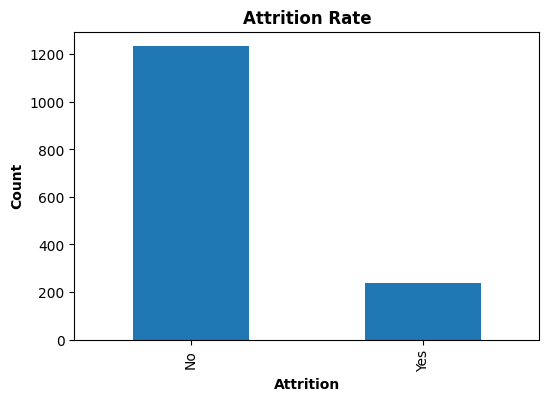

In [13]:
# Attrition counts
ax = df.Attrition.value_counts().plot(kind='bar', figsize=[6,4])
ax.set_title('Attrition Rate', fontweight= 'bold')
ax.set_xlabel('Attrition', fontweight= 'bold')
ax.set_ylabel('Count', fontweight= 'bold');

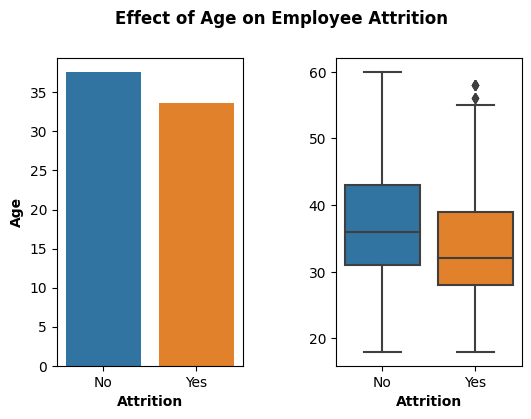

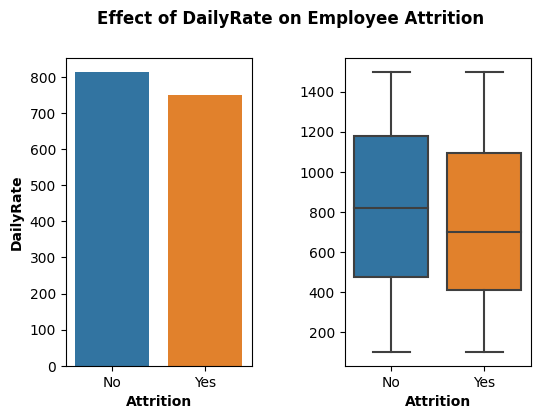

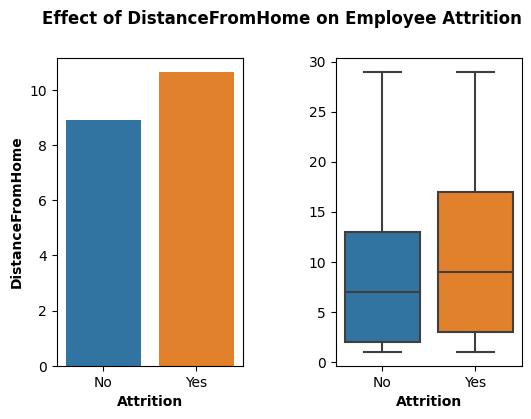

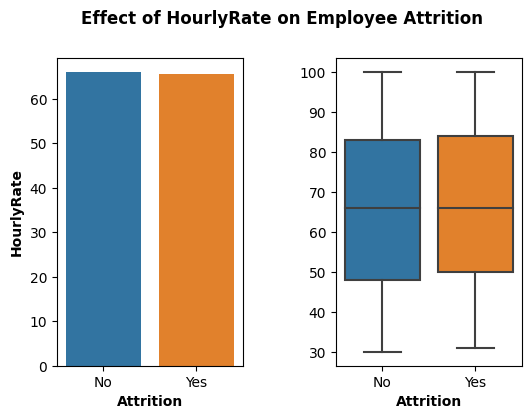

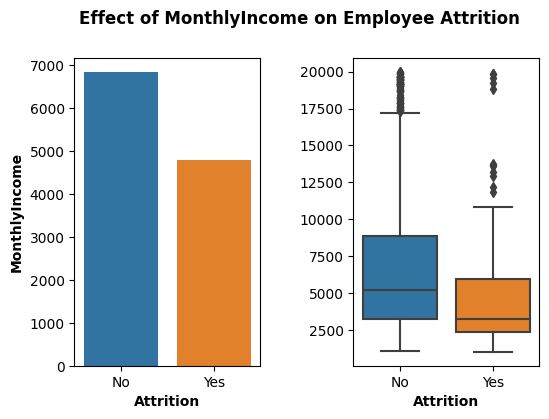

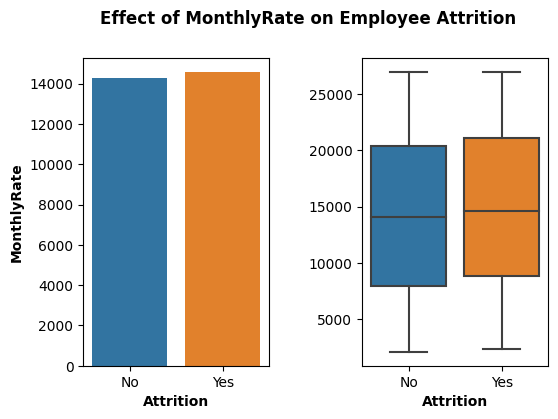

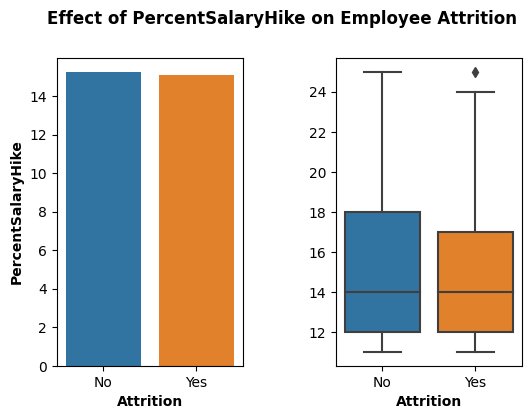

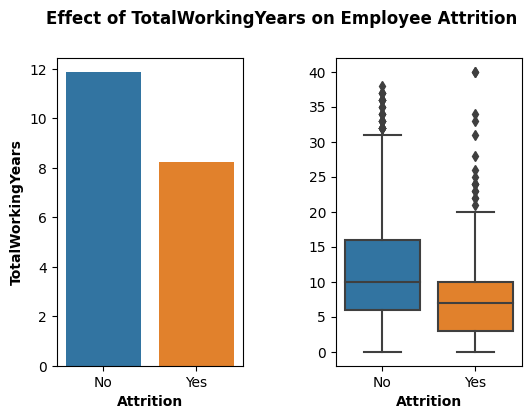

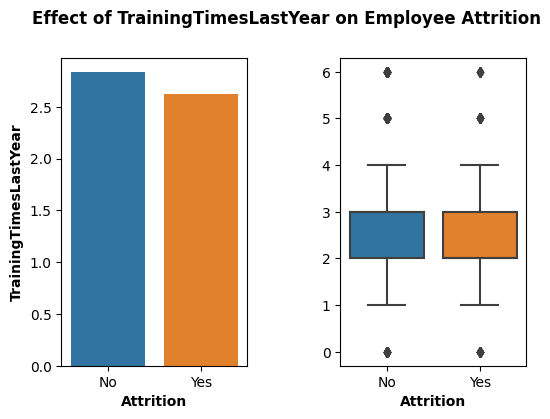

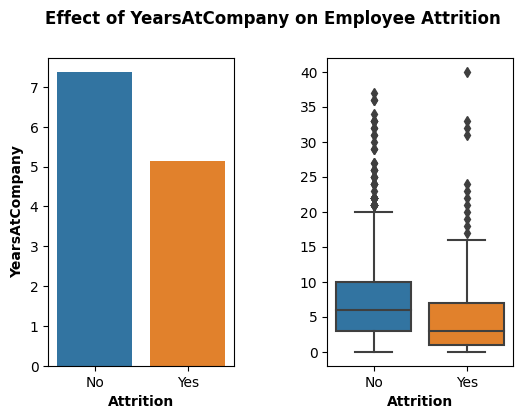

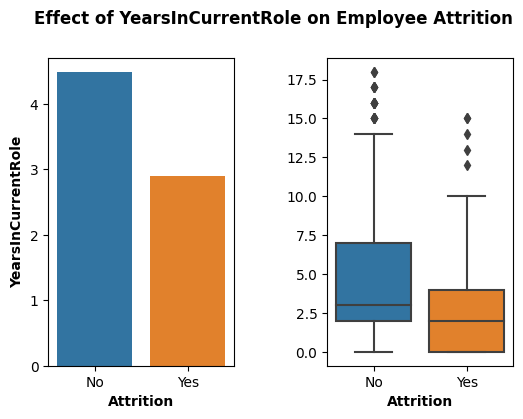

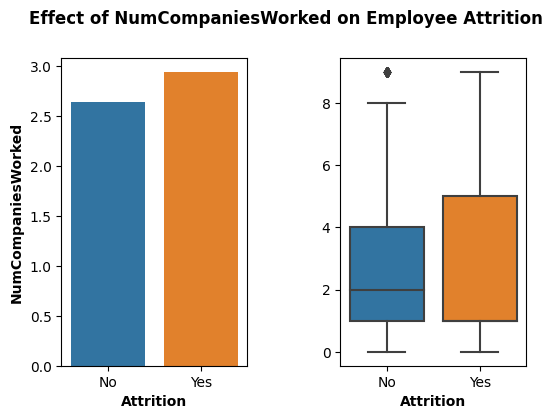

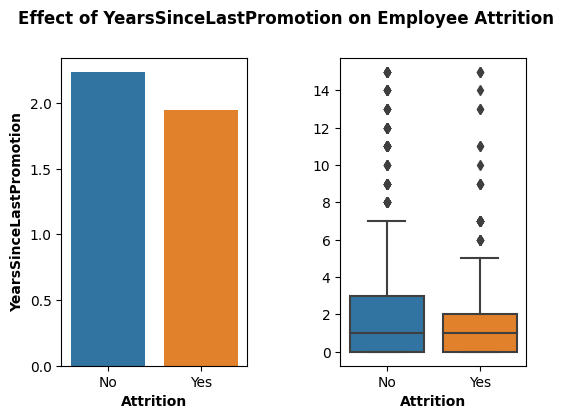

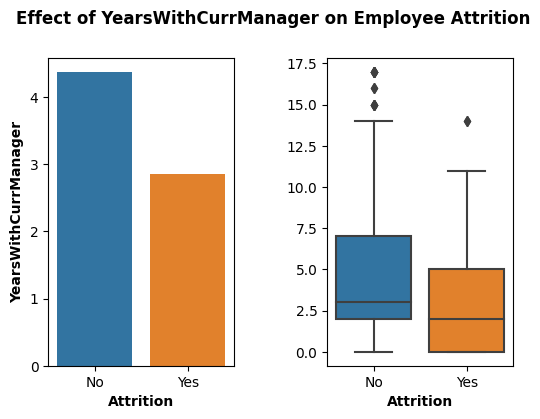

In [14]:
quanFactors1= ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike']

# Viewing the Effect  of several quantitative factors on Employee attrition
for factor in quanFactors1:
    my_subplot(df, factor)

quanFactors2= ['TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
                'NumCompaniesWorked','YearsSinceLastPromotion', 'YearsWithCurrManager']

# Viewing the Effect  of several quantitative factors on Employee attrition
for factor in quanFactors2:
    my_subplot(df,factor)


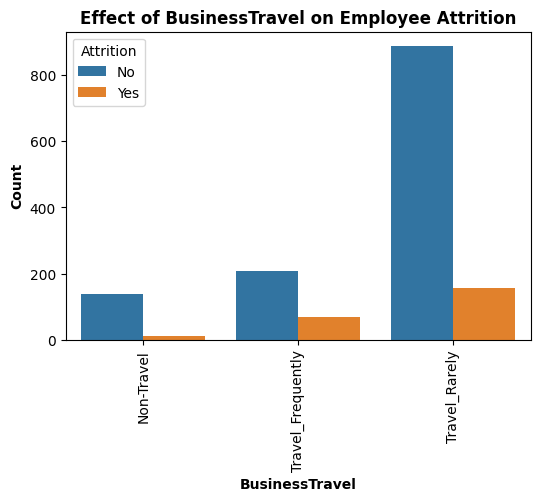

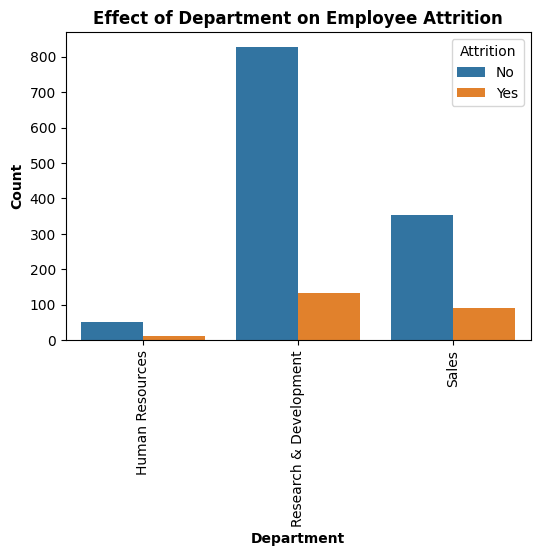

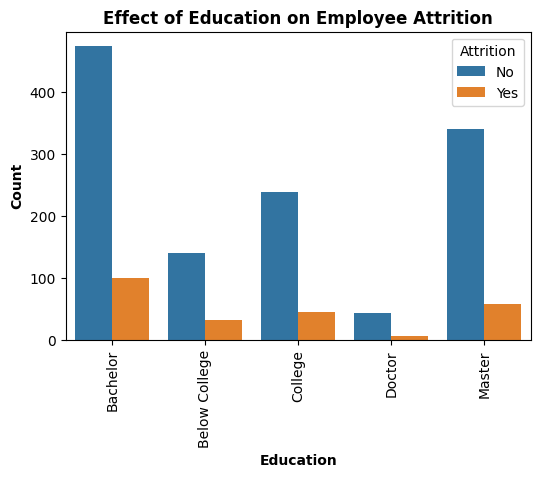

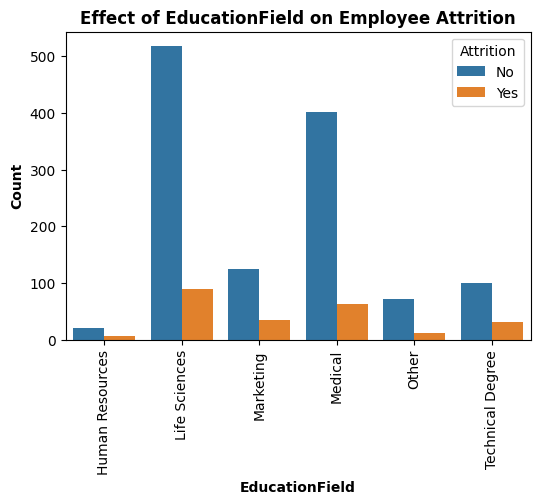

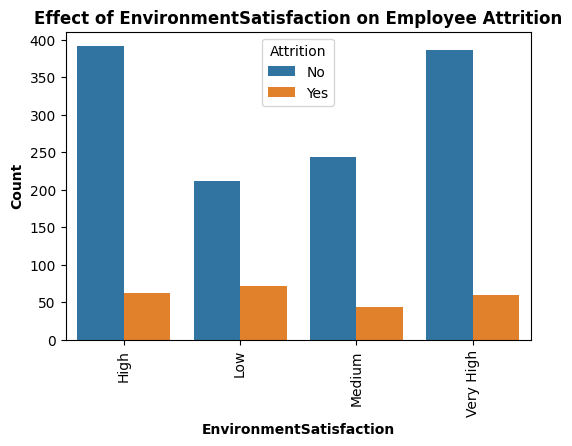

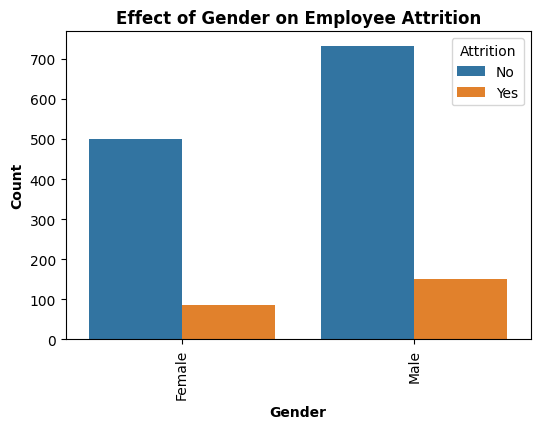

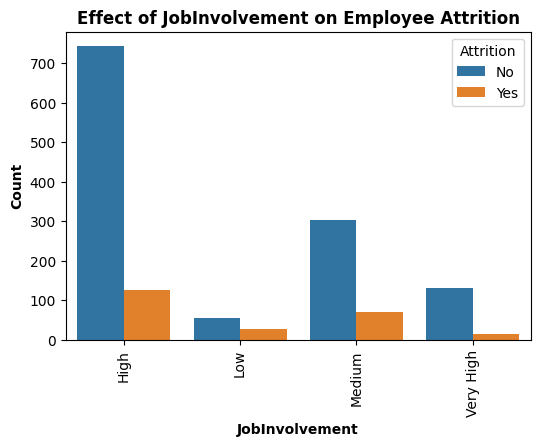

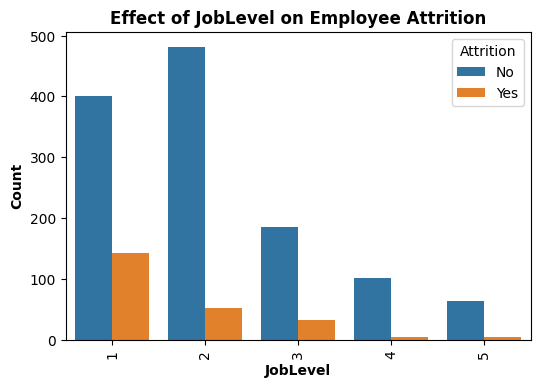

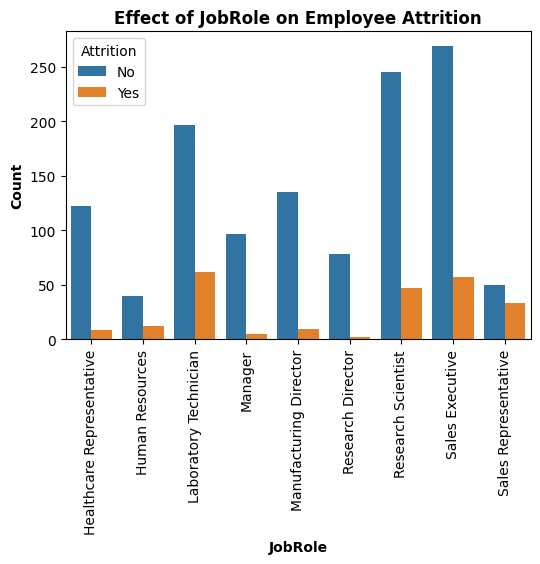

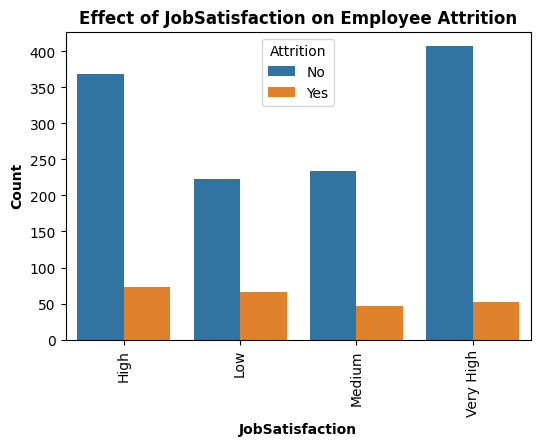

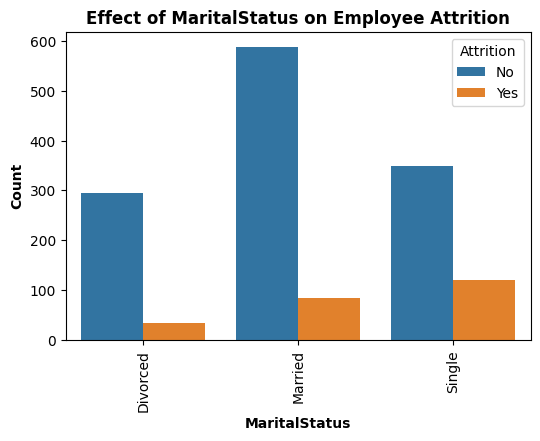

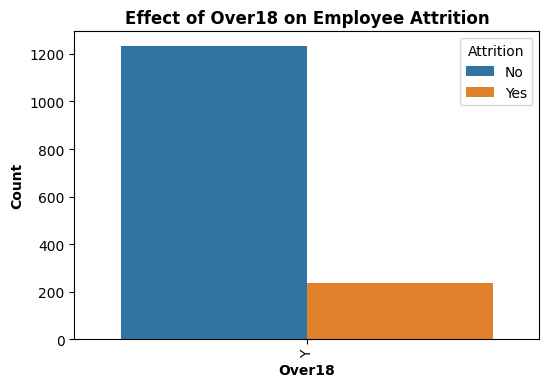

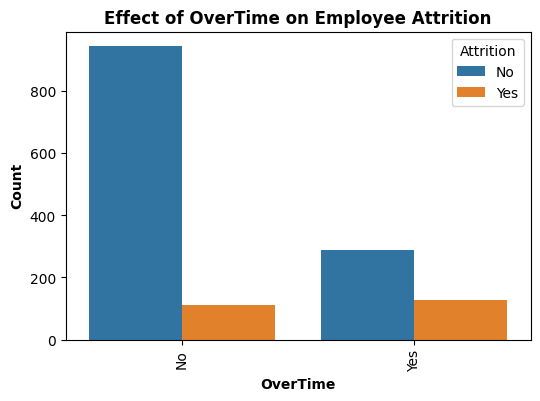

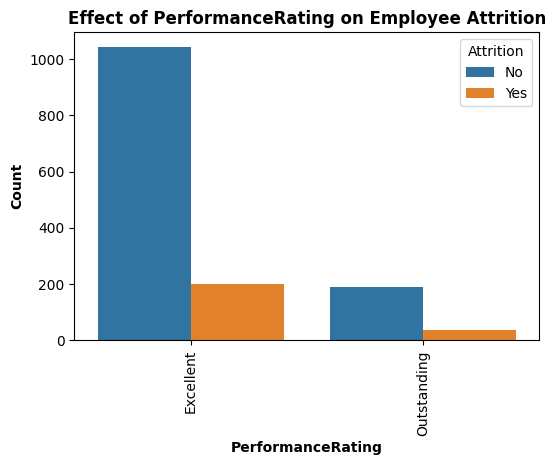

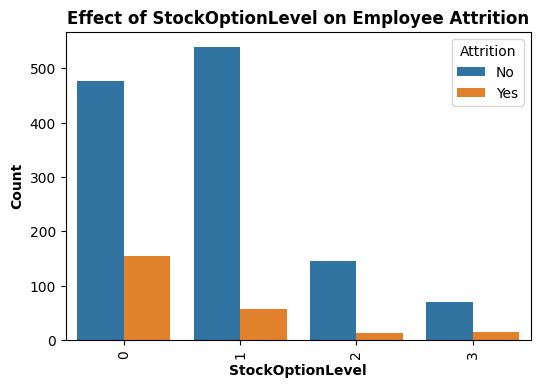

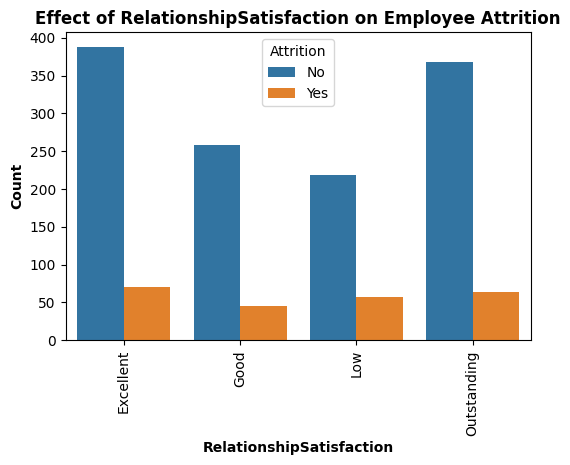

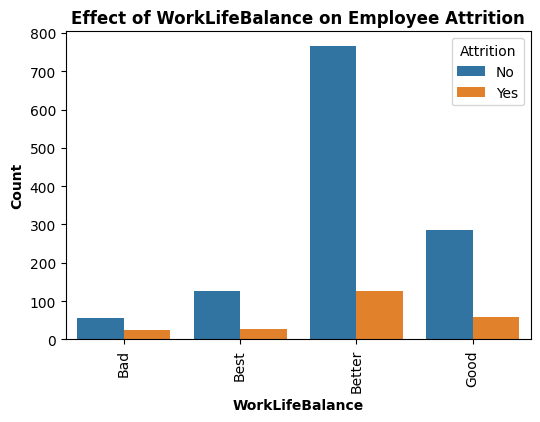

In [15]:
catFactors = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
'PerformanceRating', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance']

# Viewing the Effect  of several categorical factors on Employee attrition
for factor in catFactors:
    my_countplot(df, factor)

From the various plots, we can see that employees with low monthly income are affected by employee attrition. Employees with lesser working years are affected by employee attrition. Checking the effect of overtime on employee attrition, we see that employees that work overtime are more affected by attrition than employees that do not work overtime. Finally, employees with the lowest job level are easily affected by attrition. \
Therefore, the 3 main factors that affect employee attrition are monthly income, overtime and job level.

### 2. Relationship between Education and Monthly Income

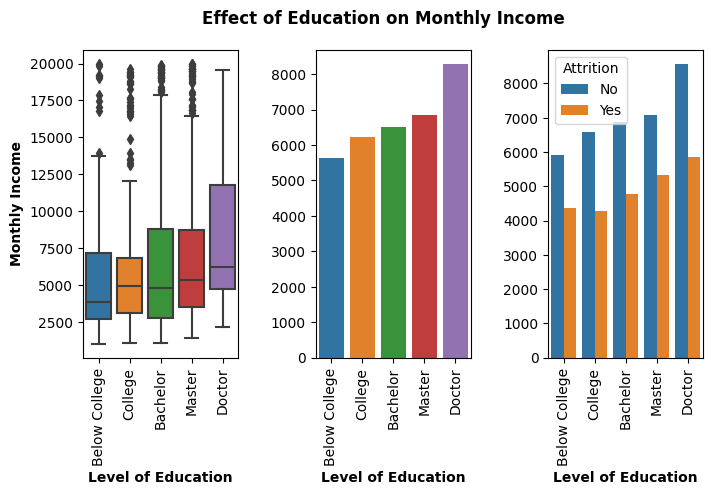

In [16]:
# Relationship between Education and Monthly Income
fig,(ax1,ax2,ax3)= plt.subplots(1, 3, figsize=[8,4])
classes = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']
edulevel = pd.CategoricalDtype(ordered=True, categories= classes)
df['Education'] = df['Education'].astype(edulevel)
# Boxplot
sb.boxplot(data=df, x='Education', y='MonthlyIncome', ax=ax1)
ax1.tick_params('x', labelrotation=90)
ax1.set_xlabel("Level of Education", weight='bold')
ax1.set_ylabel("Monthly Income",weight='bold')

# Barplot
sb.barplot(data=df, x= 'Education', y= 'MonthlyIncome',errorbar=None, ax=ax2)
ax2.tick_params('x', labelrotation=90)
ax2.set_xlabel("Level of Education",weight='bold')
ax2.get_yaxis().get_label().set_visible(False)

# Clusterbar
sb.barplot(data=df, x= 'Education', y= 'MonthlyIncome', errorbar=None, hue='Attrition', ax=ax3)
ax3.tick_params('x', labelrotation=90)
ax3.set_xlabel("Level of Education", weight='bold')
ax3.get_yaxis().get_label().set_visible(False)
plt.suptitle("Effect of Education on Monthly Income", fontweight= "bold")
plt.subplots_adjust(wspace= 0.5);

We can deduce from the bar chart above that the average income of  employees with higher education level is more than employees with lower level of education. From the boxplot, we can deduce that the monthly income of Doctor employees are the highest, followed by Master and Bachelor. Below College and College employees earn the lowest monthly income. Although there are outliers in the Below college, College, Bachelor and Master employess, Most of the data points lies within the box and this suggests that the higher the education level, the higher the monthly income.

### 3. What is the effect of age on attrition?

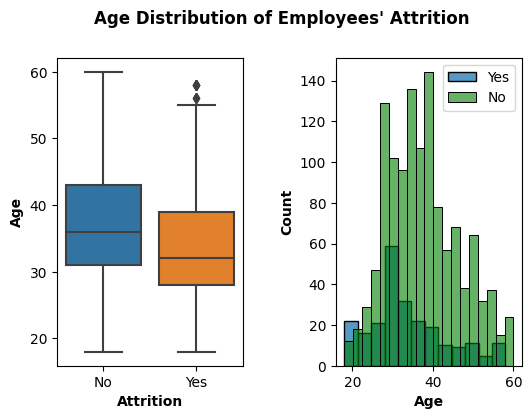

In [17]:
# Effect of age on attrition
# Boxplot
fig, axes= plt.subplots(1, 2, figsize=[6,4])
sb.boxplot(data=df, x='Attrition', y='Age', ax=axes[0])
axes[0].set_xlabel("Attrition",weight='bold')
axes[0].set_ylabel("Age",weight='bold')

# Histogram
yes = df[df.Attrition == 'Yes']['Age']
no = df[df.Attrition == 'No']['Age']
sb.histplot(yes, label='Yes', ax= axes[1])
sb.histplot(no, label='No', color='green', alpha=0.6, ax= axes[1])
axes[1].set_xlabel("Age",weight='bold')
axes[1].set_ylabel("Count",weight='bold')
plt.suptitle("Age Distribution of Employees' Attrition", fontweight='bold',y=1.0)
plt.subplots_adjust(wspace= 0.5)
plt.legend();

The higher number of individuals that retained their employment is between the ages of 28 and 40 years.
We see that some employees below 30 years of age are affected by employee attrition.

### 4. Is Income the main factor in employee attrition?

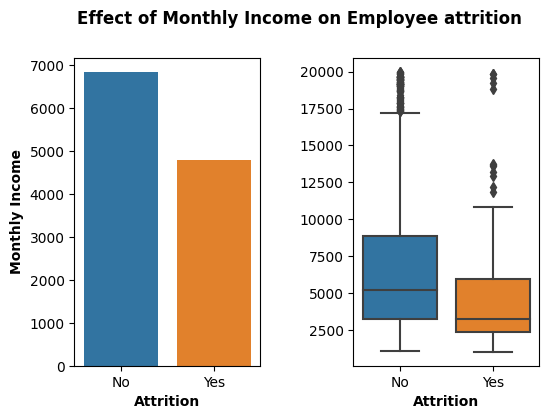

In [18]:
# Effect on Monthly Income on Employee attrition

# BarChart
fig, axes= plt.subplots(1, 2, figsize=[6,4])
sb.barplot(data=df, x= 'Attrition', y= 'MonthlyIncome', errorbar=None, ax=axes[0])
axes[0].set_xlabel("Attrition",weight='bold')
axes[0].set_ylabel("Monthly Income",weight='bold')
# Boxplot
sb.boxplot(data=df, x='Attrition', y='MonthlyIncome', ax= axes[1])
axes[1].set_xlabel("Attrition",weight='bold')
axes[1].get_yaxis().get_label().set_visible(False)
plt.suptitle('Effect of Monthly Income on Employee attrition', fontweight='bold', y= 1.0)
plt.subplots_adjust(wspace= 0.5);


We can deduce from the charts above that employees with lower monthly income are affected by employee attrition

### 5. How does work-life balance impact the overall attrition rate?

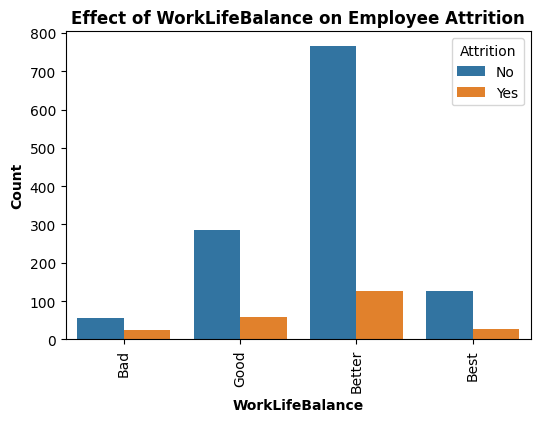

In [19]:
#Effect of Work Life Balance on Employee Attrition
classes = ['Bad', 'Good', 'Better', 'Best']
worklifebal = pd.CategoricalDtype(ordered=True, categories= classes)
df['WorkLifeBalance'] = df['WorkLifeBalance'].astype(worklifebal)
my_countplot(df, 'WorkLifeBalance');

Most employees with Better WorkLifeBalance are not affected by employee attrition